# Visualization of the simulation outputs

To understand the concrete impacts of a set of policy inputs on the transporation network, we have provided an utility called `Visualization.py` (located in the current `/utilities` folder) to **process** and **visualize the inputs and outputs of each BISTRO run**. In this notebook, we demonstrate the use of the script with the BAU scenario.

*Note*: It is assumed that this notebook is started from the `/utilities` folder.

The notebook is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span><ul class="toc-item"><li><span><a href="#Raw-scores" data-toc-modified-id="Raw-scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Raw scores</a></span></li><li><span><a href="#Good-/-Bad-score---Merged" data-toc-modified-id="Good-/-Bad-score---Merged-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Good / Bad score - Merged</a></span></li><li><span><a href="#Weighted-unstacked" data-toc-modified-id="Weighted-unstacked-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Weighted unstacked</a></span></li><li><span><a href="#Stacked" data-toc-modified-id="Stacked-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Stacked</a></span></li></ul></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Over-the-day" data-toc-modified-id="Over-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Over the day</a></span></li><li><span><a href="#By-demographic-group" data-toc-modified-id="By-demographic-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>By demographic group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Other-trips" data-toc-modified-id="Other-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Other trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time" data-toc-modified-id="Average-travel-time-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time</a></span></li><li><span><a href="#Delay" data-toc-modified-id="Delay-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Delay</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span><ul class="toc-item"><li><span><a href="#Operational-costs" data-toc-modified-id="Operational-costs-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Operational costs</a></span></li><li><span><a href="#Incentives-used" data-toc-modified-id="Incentives-used-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Incentives used</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Revenue</a></span></li></ul></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

## Importing the data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/utilities"
import sys
import os
from os import path 
# sys.path.append(r"/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/utilities/data_parsing.py")

import gzip
import tqdm

# To parse .xml output files
from lxml import etree


%load_ext autoreload
%autoreload 2

pd.set_option('display.max_colwidth', -1)

**TO-DO**: Insert the absolute links of the `sioux_faux-15k__warm-start` and `stats` folders.

In [44]:
# Define the path of the output folder 
uber_prize_starter_kit_path = r"/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/"
beam_competitions_path = r"/Users/vgolfi/Documents/GitHub/BeamCompetitions/"
warm_start_output_path = path.join(beam_competitions_path, r"fixed-data/sioux_faux/bau/warm-start/sioux_faux-15k__warm-start/")

inputs_scenarios_path = r"/Users/vgolfi/Desktop/Python_Uber_Prize/Visualization/policy_inputs_scenarios/"
scenarios_input_increase_bus_frequency_path = path.join(inputs_scenarios_path, "increased_bus_frequency/")
scenarios_input_luxembourg_path = path.join(inputs_scenarios_path, "luxembourg/")
scenarios_input_no_transit_path = path.join(inputs_scenarios_path, "no_transit/")
scenarios_input_redistributive_path = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_20-49-56/"

results_random_sample1_output_path = r"/Users/vgolfi/Documents/Results_Exploration/Random_Exploration_3/output_C9_RS17-270gx9sc/sioux_faux/sioux_faux-15k__2019-02-06_19-15-10/"
results_random_sample2_output_path = r"/Users/vgolfi/Documents/Results_Exploration/Random_Exploration_3/output_C9_RS5-b0n_9dqy/sioux_faux/sioux_faux-15k__2019-02-06_16-43-33/"

stats_output_path =path.join(beam_competitions_path, r"fixed-data/sioux_faux/bau/stats")

In [159]:
#SummaryStats
stats_data = path.join(stats_output_path, "summaryStats-15k.csv")

#Event file
event_data = path.join(warm_start_output_path, "outputEvents.xml.gz")

In [160]:
def unzip_file(path):
    if path.endswith('.gz'):
        return gzip.open(path)
    else:
        return path

## Inputs

In [67]:
# Splitting 
def splitting_min_max(df, name_column):
    b = [element_range.split(":") for element_range in df["{0}".format(name_column)].values]
    min = [i[0].replace("[","") for i in b]
    min = [i.replace("(","") for i in min]
    max = [i[1].replace("]","") for i in b]
    max = [i.replace(")","") for i in max]

#     min = pd.DataFrame(min)
# #     min.columns = ["min_{0}".format(name_column)]

#     max = pd.DataFrame(max)
# #     max.columns = ["max_{0}".format(name_column)]
    
    df["min_{0}".format(name_column)] = min
    df["max_{0}".format(name_column)] = max

    df["min_{0}".format(name_column)] = df["min_{0}".format(name_column)].astype(int)
    df["max_{0}".format(name_column)] = df["max_{0}".format(name_column)].astype(int)
    return df

#### Incentives

In [99]:
inputs_path_sample2_incentives = path.join(results_random_sample2_output_path, "competition/submission-inputs/ModeIncentives.csv")
inputs_path_sample1_incentives = path.join(results_random_sample1_output_path, "competition/submission-inputs/ModeIncentives.csv")

inputs_path_increased_bus_frequency_incentives = path.join(scenarios_input_increase_bus_frequency_path, "ModeIncentives.csv")
inputs_path_luxembourg_incentives = path.join(scenarios_input_luxembourg_path, "ModeIncentives.csv")
inputs_path_no_transit_incentives = path.join(scenarios_input_no_transit_path, "ModeIncentives.csv")
inputs_path_redistributive = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_23-49-25/competition/submission-inputs/ModeIncentives.csv"

input_incentives_data = inputs_path_redistributive


In [100]:
incentives = pd.read_csv(input_incentives_data)
incentives

,mode,age,income,amount
0,OnDemand_ride,[0:120),[1:20000),6.0
1,walk_transit,[0:120),[1:20000),6.0
2,drive_transit,[0:120),[1:20000),6.0


In [101]:
def process_incentives_data(input_incentives_data):
    incentives = pd.read_csv(input_incentives_data)
    incentives["amount"] = incentives["amount"].astype(float)
    
    # Completting the DF w/ the missing incentivized modes
    df = pd.DataFrame(["", "(0:0)", "(0:0)", 0.00]).T
    df.columns = ["mode", "age", "income", "amount"]
    modes = ["drive_transit", "walk_transit", "OnDemand_ride"]
    
    for mode in modes:
        if mode not in incentives["mode"].values:
            df["mode"] = mode
            incentives = incentives.append(df)
    
    # Splitting age and income columns
    splitting_min_max(incentives, "age")
    splitting_min_max(incentives, "income")
    
    if np.max(incentives["amount"]) == 0:
              incentives["amount_normalized"] = 0
              
    else: 
              incentives["amount_normalized"] =  incentives["amount"]/10
    
              incentives["amount_normalized"] = incentives["amount_normalized"].astype('float')
    incentives = incentives.drop(labels= ["age", "income"], axis = 1)
    
    incentives["mode"] = incentives["mode"].astype('category').cat.reorder_categories([ 
    'OnDemand_ride',       
    'drive_transit',
    'walk_transit'])

    incentives = incentives.sort_values(by="mode") 
    return incentives

In [102]:
process_incentives_data(input_incentives_data)

,mode,amount,min_age,max_age,min_income,max_income,amount_normalized
0,OnDemand_ride,6.0,0,120,1,20000,0.6
2,drive_transit,6.0,0,120,1,20000,0.6
1,walk_transit,6.0,0,120,1,20000,0.6


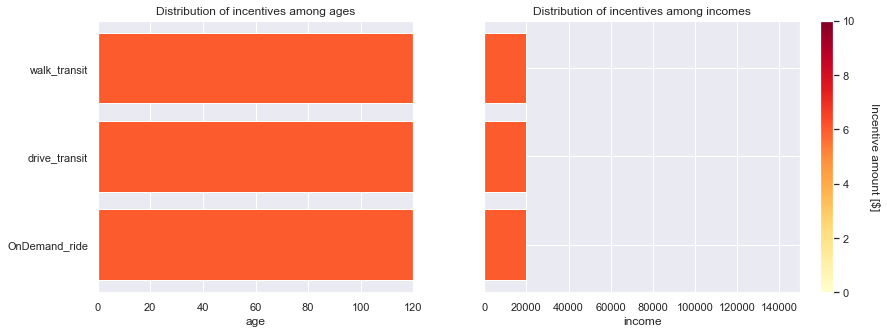

In [103]:
max_incentive = 50
max_age = 120
max_income = 150000

incentives = process_incentives_data(input_incentives_data)

fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True, gridspec_kw={'width_ratios': [4, 5]})

# color map
my_cmap = plt.cm.get_cmap('YlOrRd')
colors = my_cmap(incentives["amount_normalized"])

# plot
ax[0].barh(incentives["mode"], incentives["max_age"] - incentives["min_age"], left=incentives["min_age"], color=colors)
ax[1].barh(incentives["mode"], incentives["max_income"]-incentives["min_income"], left=incentives["min_income"], color=colors)

ax[0].set_xlabel("age")
ax[0].set_xlim((0, max_age))

ax[1].set_xlabel("income")
ax[1].set_xlim((0, max_income))

ax[0].set_title("Distribution of incentives among ages", fontsize=12)
ax[1].set_title("Distribution of incentives among incomes", fontsize=12)

plt.yticks(fontsize=11)
# plt.suptitle("Input - Incentives by age and income group", fontweight="bold", fontsize=15)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, np.max(incentives["amount"])))
sm.set_array([])
sm.set_clim(0, 10)
cbar = fig.colorbar(sm, ticks=[i for i in range(0, 11, 2)])
cbar.set_label('Incentive amount [$]', rotation=270, labelpad=25)

# plt.savefig("Input-Incentives-ages-increased_bus_frequency", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-luxembourg", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-no_transit", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-Redistributive", bbox_inches="tight")
# plt.savefig("Input-Incentives-ages-Sample1", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-Sample2", bbox_inches="tight" )


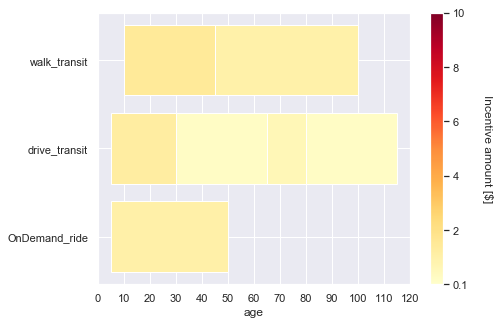

In [78]:
incentives = process_incentives_data(input_incentives_data)

fig, ax = plt.subplots(figsize = (7,5))
#color map
my_cmap = plt.cm.get_cmap('YlOrRd')
colors = my_cmap(incentives["amount_normalized"])

#plot
bars = plt.barh(incentives["mode"], incentives["max_age"]-incentives["min_age"], left=incentives["min_age"], color = colors)
plt.yticks(fontsize = 11)

ax.set_xlabel("age")
plt.xlim((0,120))

# plt.title("Input - Incentives- Sample 1", fontweight = "bold", pad=12, fontsize = 15)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

sm = ScalarMappable(cmap = my_cmap, norm=plt.Normalize(0,np.max(incentives["amount"])))
sm.set_array([])
sm.set_clim(0,10)
cbar = fig.colorbar(sm, ticks=[0, 2, 4, 6, 8, 10])
cbar.set_label('Incentive amount [$]', rotation=270, labelpad=25)
cbar.ax.set_yticklabels(['0.1', '2', '4','6', '8','10'])

# plt.savefig("Input-Incentives-ages-increased_bus_frequency", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-luxembourg", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-no_transit", bbox_inches="tight" )
# plt.savefig("Input-Incentives-ages-Redistributive", bbox_inches="tight")
plt.savefig("Input-Incentives-ages-Sample1", bbox_inches="tight" )

plt.show()

In [266]:
process_incentives_data(input_incentives_data)

,mode,amount,min_age,max_age,min_income,max_income,amount_normalized
0,OnDemand_ride,6.0,0,120,1,20000,1.0
2,drive_transit,6.0,0,120,1,20000,1.0
1,walk_transit,6.0,0,120,1,20000,1.0


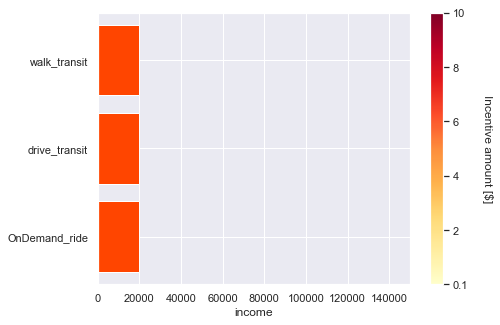

In [267]:
incentives = process_incentives_data(input_incentives_data)

fig, ax = plt.subplots(figsize = (7,5))
#color map
my_cmap2 = plt.cm.get_cmap('YlOrRd')
colors2 = my_cmap2(incentives["amount_normalized"])

#plot
bars = plt.barh(incentives["mode"], incentives["max_income"]-incentives["min_income"], left=incentives["min_income"], color = "orangered")
plt.yticks(fontsize = 11)

ax.set_xlabel("income")
plt.xlim((0,150000))

# plt.title("Input - Incentives - Sample 1", fontweight = "bold", pad=12, fontsize = 15)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))

sm = ScalarMappable(cmap = my_cmap2, norm=plt.Normalize(0,np.max(incentives["amount"])))
sm.set_array([])
sm.set_clim(0,10)
cbar = fig.colorbar(sm, ticks=[0, 2, 4, 6, 8, 10])
cbar.set_label('Incentive amount [$]', rotation=270, labelpad=25)
cbar.ax.set_yticklabels(['0.1', '2', '4','6', '8','10'])

# plt.savefig("Input-Incentives_income_increased_bus_frequency", bbox_inches="tight" )
# plt.savefig("Input-Incentives_income_-luxembourg", bbox_inches="tight" )
# plt.savefig("Input-Incentives_income_-no_transit", bbox_inches="tight" )
plt.savefig("Input-Incentives_income_-Redistributive", bbox_inches="tight" )

plt.show()

#### FleetMix

In [197]:
inputs_path_bau = r"/Users/vgolfi/Documents/GitHub/BeamCompetitions/fixed-data/sioux_faux/bau/warm-start/sioux_faux-1k__warm-start/competition/submission-inputs/VehicleFleetMix.csv"
inputs_path_good_fleet = path.join(results_random_good_output_path, "competition/submission-inputs/VehicleFleetMix.csv")
inputs_path_bad_fleet = path.join(results_random_bad_output_path, "competition/submission-inputs/VehicleFleetMix.csv")

inputs_path_increased_bus_frequency_fleet = path.join(scenarios_input_increase_bus_frequency_path, "VehicleFleetMix.csv")
inputs_path_luxembourg_fleet = path.join(scenarios_input_luxembourg_path, "VehicleFleetMix.csv")
inputs_path_no_transit_fleet = path.join(scenarios_input_no_transit_path, "VehicleFleetMix.csv")
inputs_path_redistributive = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_20-49-56/competition/submission-inputs/VehicleFleetMix.csv"


fleet_mix_data = inputs_path_redistributive


In [198]:
def process_bus_data(fleet_mix_data):
    fleet_mix = pd.read_csv(fleet_mix_data)    
    
#     # If BAU case
#     df_bau = pd.DataFrame([[217, "1340", "BUS-DEFAULT"],[217, "1341", "BUS-DEFAULT"], [217, "1342", "BUS-DEFAULT"], 
#                           [217, "1343", "BUS-DEFAULT"], [217, "1344", "BUS-DEFAULT"], [217, "1345", "BUS-DEFAULT"],
#                           [217, "1346", "BUS-DEFAULT"], [217, "1347", "BUS-DEFAULT"], [217, "1348", "BUS-DEFAULT"],
#                           [217, "1349", "BUS-DEFAULT"], [217, "1350", "BUS-DEFAULT"], [217, "1351", "BUS-DEFAULT"]])
#     df_bau.columns = ["agencyId", "routeId", "vehicleTypeId"]
#     fleet_mix = fleet_mix.append(df_bau)
    
#     fleet_mix["vehicleTypeId"] = fleet_mix["vehicleTypeId"].astype('category')
    
# Make sure that all buses types appear in the DF
    df = pd.DataFrame([217, "1", "BUS-DEFAULT"], ).T
    df.columns = ["agencyId", "routeId", "vehicleTypeId"]
    buses = ["BUS-STD-HD", "BUS-SMALL-HD", "BUS-DEFAULT", "BUS-STD-ART"]

    for bus in buses:
        if bus not in fleet_mix["vehicleTypeId"].values:
            df["vehicleTypeId"] = bus
            fleet_mix = fleet_mix.append(df)
    
# Make sure that all routes appear in the DF
    fleet_mix["routeId"] = fleet_mix["routeId"].astype(int)
    df = pd.DataFrame([217, "", "BUS-DEFAULT"]).T
    df.columns = ["agencyId", "routeId", "vehicleTypeId"]

    for route in [i for i in np.arange(1340, 1352, 1)]:
        if route not in fleet_mix["routeId"].values:
            df["routeId"] = route
            fleet_mix = fleet_mix.append(df)
    
    
    fleet_mix["vehicleTypeId"] = fleet_mix["vehicleTypeId"].astype('category').cat.reorder_categories(["BUS-DEFAULT","BUS-SMALL-HD","BUS-STD-HD","BUS-STD-ART"])

    fleet_mix = fleet_mix.drop(labels= "agencyId", axis = 1)
    fleet_mix["routeId"].astype(int)
    
    fleet_mix.sort_values(by="vehicleTypeId", inplace=True)
    fleet_mix.reset_index(inplace=True, drop=True)

    return fleet_mix

In [199]:
buses = process_bus_data(fleet_mix_data)
buses

,routeId,vehicleTypeId
0,1,BUS-DEFAULT
1,1340,BUS-DEFAULT
2,1341,BUS-DEFAULT
3,1342,BUS-DEFAULT
4,1343,BUS-DEFAULT
5,1344,BUS-DEFAULT
6,1345,BUS-DEFAULT
7,1346,BUS-DEFAULT
8,1347,BUS-DEFAULT
9,1348,BUS-DEFAULT


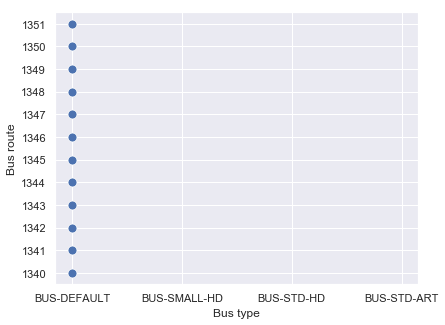

In [200]:
fig, ax = plt.subplots(figsize = (6.5,5))
ax = sns.scatterplot(x = "vehicleTypeId", y = "routeId", data = buses, s = 80)
plt.yticks(fontsize = 11)
# plt.tick_params('both')
plt.xlabel("Bus type")
plt.ylabel("Bus route")
plt.ylim((1339.5,1351.5))
# plt.title("Input - Bus fleet mix - Sample 1", fontweight = "bold", pad=12, fontsize = 15)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# xticks[0].label1.set_visible(False)

# plt.savefig("Input-Bus_fleet_mix-Increase_bus_frequency", bbox_inches="tight")
# plt.savefig("Input-Bus_fleet_mix-luxembourg", bbox_inches="tight")
plt.savefig("Input-Bus_fleet_mix-no_transit", bbox_inches="tight")
# plt.savefig("Input-Bus_fleet_mix-BAU", bbox_inches="tight")

plt.show()

#### Fares

In [182]:
inputs_path_good_fares = path.join(results_random_good_output_path, "competition/submission-inputs/MassTransitFares.csv")
inputs_path_bad_fares = path.join(results_random_bad_output_path, "competition/submission-inputs/MassTransitFares.csv")
inputs_path_fares_bau = path.join(warm_start_output_path, "competition/submission-inputs/MassTransitFares.csv")

inputs_path_increased_bus_frequency_fares = path.join(scenarios_input_increase_bus_frequency_path, "MassTransitFares.csv")
inputs_path_luxembourg_fares = path.join(scenarios_input_luxembourg_path, "MassTransitFares.csv")
inputs_path_no_transit_fares = path.join(scenarios_input_no_transit_path, "MassTransitFares.csv")
inputs_path_redistributive = path.join(scenarios_input_redistributive, "competition/submission_inputs/MassTransitFares.csv")
inputs_path_redistributive = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_20-49-56/competition/submission-inputs/MassTransitFares.csv"
fares_data = inputs_path_redistributive
fares_data_bau = inputs_path_fares_bau

In [183]:
def process_fares_data_bau(fares_data_bau):
    fares = pd.read_csv(fares_data_bau)
    fares = fares.drop(labels= ["agencyId"], axis = 1)

    # For BAU
    df = pd.DataFrame(columns = ["routeId", "age", "amount"])
    fares["age"] = fares["age"].astype(str)
    for age, amount in zip(fares["age"].values, fares["amount"]):
        df1 = pd.DataFrame([[1340, age, amount], [1341, age, amount], [1342, age, amount], [1343, age, amount], 
                            [1344, age, amount], [1345, age, amount], [1346, age, amount], [1347, age, amount], 
                            [1348, age, amount], [1349, age, amount], [1350, age, amount], [1351, age, amount]],
                          columns = ["routeId", "age", "amount"])
        df = df.append(df1)
    fares["amount"] = fares["amount"].astype(float)
    
    fares = splitting_min_max(df, "age")
    
    fares = fares.drop(labels= ["age"], axis = 1)
    fares = fares.sort_values(by="routeId")
    fares["routeId"] = fares["routeId"].astype(int)
    fares["amount_normalized"] =  fares["amount"]/np.max(fares["amount"])
    
    return fares

In [184]:
def process_fares_data(fares_data):
    fares = pd.read_csv(fares_data)
    fares = fares.drop(labels= ["agencyId"], axis = 1)
    
    fares["routeId"] = fares["routeId"].astype(int)
    fares["amount"] = fares["amount"].astype(float)
    
    a = pd.read_csv(fares_data)["age"]
    b = [age_range.split(":") for age_range in a.values]
    if len(b) == 0:
        min = [0]
        max = [0]
        
    else: 
        min = [i[0].replace("[","") for i in b]
        min = [i.replace("(","") for i in min]
        max = [i[1].replace("]","") for i in b]
        max = [i.replace(")","") for i in max]
    
    min = pd.DataFrame(min, columns=["min_age"])
    max = pd.DataFrame(max, columns=["max_age"])

    fares["min_age"] = min
    fares["max_age"] = max

    fares["min_age"] = fares["min_age"].astype(int)
    fares["max_age"] = fares["max_age"].astype(int)
    
    if np.max(fares["amount"]) == 0:
        fares["amount_normalized"] =  0
    else: 
        fares["amount_normalized"] =  fares["amount"]/np.max(fares["amount"])
    
    fares = fares.drop(labels= ["age"], axis = 1)
    fares = fares.sort_values(by="routeId")
    return fares

In [185]:
pd.read_csv(fares_data_bau)

,agencyId,routeId,age,amount
0,217,NaN,(10:65],1.50
1,217,NaN,(6:10],0.75


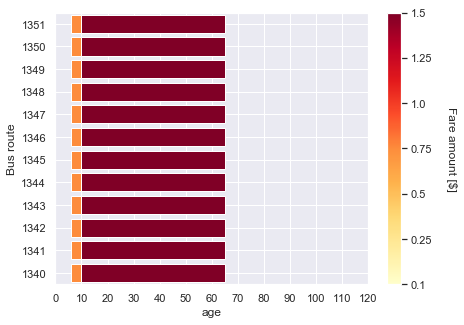

In [186]:
fares = process_fares_data_bau(fares_data_bau)
# fares_non_Bau = process_fares_data(fares_data)

fig, ax = plt.subplots(figsize = (7,5))
#color map
my_cmap = plt.cm.get_cmap('YlOrRd')
colors = my_cmap(fares["amount_normalized"])
#plot
bars = plt.barh(fares["routeId"], fares["max_age"]-fares["min_age"], left=fares["min_age"], color = colors)
# scores.plot.barh(stacked=True)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

plt.yticks(fontsize = 11)
plt.xlabel("age")
plt.ylabel("Bus route")
plt.ylim((1339.5,1351.5))
plt.xlim((0,120))
# plt.title("Input - Mass Transit Fares - BAU", fontweight = "bold", pad=12, fontsize = 15)

sm = ScalarMappable(cmap = my_cmap, norm=plt.Normalize(0,np.max(fares["amount"])))
sm.set_array([])
# cbar = plt.colorbar(sm) 
cbar = fig.colorbar(sm, ticks=[0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
cbar.set_label('Fare amount [$]', rotation=270, labelpad=25)
cbar.ax.set_yticklabels(['0.1', '0.25', '0.5', '0.75', '1.0', '1.25', '1.5'])

plt.savefig("Input-Mass_Transit_BAU", bbox_inches="tight" )
# plt.savefig("Input-Mass_Transit_increase_bus_frequency", bbox_inches="tight" )

plt.show()

In [187]:
pd.read_csv(fares_data)

,agencyId,routeId,age,amount
0,217,1340,[18:65),6.0
1,217,1341,[18:65),6.0
2,217,1342,[18:65),6.0
3,217,1343,[18:65),6.0
4,217,1344,[18:65),6.0
5,217,1345,[18:65),6.0
6,217,1346,[18:65),6.0
7,217,1347,[18:65),6.0
8,217,1348,[18:65),6.0
9,217,1349,[18:65),6.0


In [188]:
process_fares_data(fares_data)

,routeId,amount,min_age,max_age,amount_normalized
0,1340,6.0,18,65,1.0
1,1341,6.0,18,65,1.0
2,1342,6.0,18,65,1.0
3,1343,6.0,18,65,1.0
4,1344,6.0,18,65,1.0
5,1345,6.0,18,65,1.0
6,1346,6.0,18,65,1.0
7,1347,6.0,18,65,1.0
8,1348,6.0,18,65,1.0
9,1349,6.0,18,65,1.0


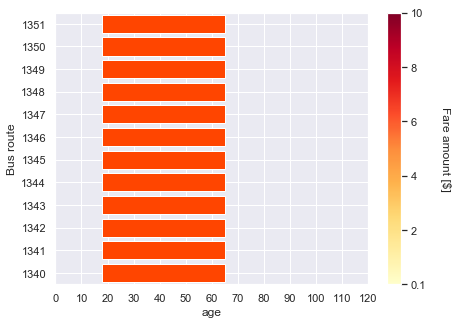

In [195]:
fares = process_fares_data(fares_data)

fig, ax = plt.subplots(figsize = (7,5))
#color map
my_cmap = plt.cm.get_cmap('YlOrRd')
colors = my_cmap(fares["amount_normalized"])
#plot
bars = plt.barh(fares["routeId"], fares["max_age"]-fares["min_age"], left=fares["min_age"], color = "orangered")

plt.yticks(fontsize = 11)
plt.xlabel("age")
plt.ylabel("Bus route")
plt.ylim((1339.5,1351.5))
plt.xlim((0,120))
# plt.title("Input - Mass Transit Fares - Sample 1", fontweight = "bold", pad=12, fontsize = 15)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

sm = ScalarMappable(cmap = my_cmap, norm=plt.Normalize(0,10))
sm.set_array([])
# cbar = plt.colorbar(sm) 
cbar = fig.colorbar(sm, ticks=[0, 2, 4, 6, 8, 10])
cbar.set_label('Fare amount [$]', rotation=270, labelpad=25)
cbar.ax.set_yticklabels(['0.1', '2', '4','6', '8','10'])

# plt.savefig("Input-Mass_Transit_Fares-Sample_1", bbox_inches="tight" )
# plt.savefig("Input-Mass_Transit_Fares-Sample_2", bbox_inches="tight" )
# plt.savefig("Input-Mass_Transit_no_transit", bbox_inches="tight" )
# plt.savefig("Input-Mass_Transit_luxembourg", bbox_inches="tight" )
plt.savefig("Input-Mass_Transit_Redistributive", bbox_inches="tight" )


plt.show()

In [77]:
process_fares_data(fares_data)

,routeId,amount,min_age,max_age,amount_normalized
5,1340,4.3,18,86,0.462366
2,1342,5.5,32,54,0.591398
3,1343,9.3,24,40,1.000000
0,1344,4.3,82,84,0.462366
1,1345,3.7,8,89,0.397849
4,1346,3.9,12,45,0.419355
9,1347,0.8,92,117,0.086022
7,1348,9.2,97,112,0.989247
6,1349,7.8,98,114,0.838710
8,1350,1.2,42,118,0.129032


#### Bus frequency

In [53]:
inputs_path_sample2_frequency = path.join(results_random_sample2_output_path, "competition/submission-inputs/FrequencyAdjustment.csv")
inputs_path_sample1_frequency = path.join(results_random_sample1_output_path, "competition/submission-inputs/FrequencyAdjustment.csv")

inputs_path_increased_bus_frequency_frequency = path.join(scenarios_input_increase_bus_frequency_path, "FrequencyAdjustment.csv")
inputs_path_luxembourg_frequency = path.join(scenarios_input_luxembourg_path, "FrequencyAdjustment.csv")
inputs_path_no_transit_frequency = path.join(scenarios_input_no_transit_path, "FrequencyAdjustment.csv")
inputs_path_redistributive_frequency = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_23-49-25/competition/submission-inputs/FrequencyAdjustment.csv"

frequency_data = inputs_path_redistributive_frequency
trips_path = path.join(uber_prize_starter_kit_path, r"reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")


In [58]:
def process_frequency_data(frequency_data):
    import datetime
    frequency = pd.read_csv(frequency_data)
    
    
    # Add all missing routes (the ones that were not changed) in the DF so that they appear int he plot
    df = pd.DataFrame([0, 0, 0, 1, 0]).T
    df.columns = ["route_id", "start_time", "end_time", "headway_secs", "exact_times"]
    
    routes = [route for route in np.arange(1340, 1352,1)]

    for route in routes:
        if route not in frequency["route_id"].values:
            df["route_id"] = route
            frequency = frequency.append(df)
    
    def seconds_to_hours(second):
        return datetime.timedelta(seconds=second())
            
    frequency["start_time"] = (frequency["start_time"].astype(int)/3600).round(1)
    frequency["end_time"] = (frequency["end_time"].astype(int)/3600).round(1)
    frequency["headway_secs"] = (frequency["headway_secs"].astype(int)/3600).round(1)
    frequency["route_id"] = frequency["route_id"].astype(int)
    
    frequency = frequency.sort_values(by = "route_id")
    frequency = frequency.set_index("route_id")


    return frequency

In [59]:
frequencies = process_frequency_data(frequency_data)
frequencies

,start_time,end_time,headway_secs,exact_times
route_id,,,,
1340,0.0,0.0,0.0,0
1341,0.0,0.0,0.0,0
1342,0.0,0.0,0.0,0
1343,0.0,0.0,0.0,0
1344,0.0,0.0,0.0,0
1345,0.0,0.0,0.0,0
1346,0.0,0.0,0.0,0
1347,0.0,0.0,0.0,0
1348,0.0,0.0,0.0,0


In [60]:
# Defines a set of 12 colors for the bus lines  
colors = ['blue','red','green', 'orange', 'purple', 'yellow', 'pink', 'gold', 'lime', 'steelblue', 'm', 'limegreen' ]
color_dict = {frequencies.index.unique()[i]:colors[i] for i in range(12)}

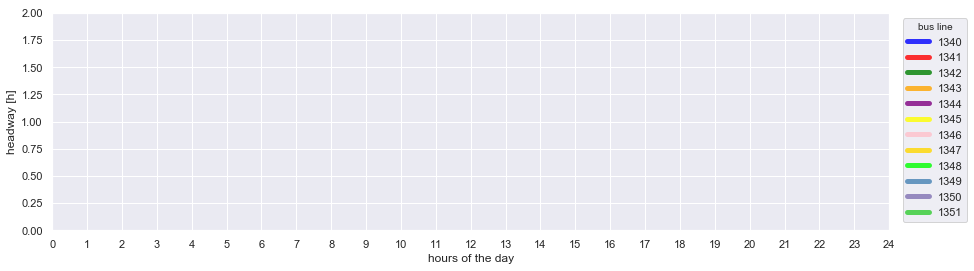

In [61]:
fig, ax = plt.subplots(figsize=(15, 4))

plotted_lines = []

for idx in range(len(frequencies)):
    row_freq = frequencies.iloc[idx]
    height = row_freq.headway_secs
    height = height + np.random.normal(0, 0.03, 1)
    if row_freq.name not in plotted_lines:
        ax.plot([row_freq.start_time, row_freq.end_time], [height, height],
                label = row_freq.name, linewidth=5, alpha=0.8, color=color_dict[row_freq.name])
        plotted_lines.append(row_freq.name)
    else:
        ax.plot([row_freq.start_time, row_freq.end_time], [height, height],
               linewidth=5, alpha=0.8, color=color_dict[row_freq.name])
        
plt.legend(bbox_to_anchor=(1.1, 1.0), title='bus line')
plt.ylim(0.0, 2.0)
plt.xticks(np.arange(0, 25, 1))
ax.set_xlim(0, 24)
plt.ylabel("headway [h]")
plt.xlabel("hours of the day")

# plt.savefig("Frequency_input_increase_frequencies",bbox_inches="tight")
# plt.savefig("Frequency_input_luxembourg",bbox_inches="tight")
# plt.savefig("Frequency_input_no_transit",bbox_inches="tight")
plt.savefig("Frequency_input_redistributive",bbox_inches="tight")




In [195]:
frequencies

,start_time,end_time,headway_secs
route,,,
1340,0.8,14.5,1.3
1341,0.0,0.0,0.0
1342,3.6,15.4,1.2
1343,2.6,4.6,1.4
1344,15.5,19.0,1.2
1345,0.0,0.0,0.0
1346,9.0,18.1,1.3
1347,0.0,0.0,0.0
1348,2.1,7.4,1.4


In [191]:
for i in frequencies.iterrows():
    pass

In [1261]:
roq_freq.start_time

0.0

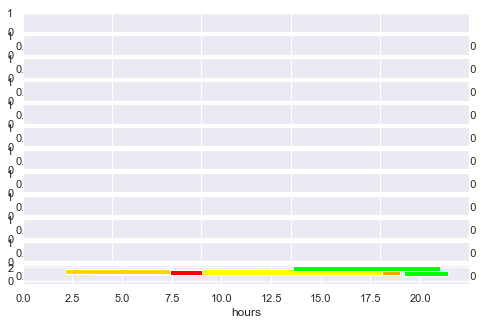

In [1248]:
fig, ax = plt.subplots(12,1, figsize = (8,5))
#plot
colors = ['blue','red','green', 'orange', 'purple', 'yellow', 'pink', 'gold', 'lime', 'steelblue', 'm' ]
for i, route in enumerate(np.arange(1341, 1352)):
    ax[i] = plt.barh(frequencies.loc[route,"headway_secs"], frequencies.loc[route,"end_time"]-frequencies.loc[route,"start_time"], left=frequencies.loc[route,"start_time"], color = colors[i])
    ax[11].set_xlabel("hours")
plt.yticks(fontsize = 11)


# plt.ylim((1339.5,1351.5))

# plt.title("Input - Mass Transit Fares - Sample 1", fontweight = "bold", pad=12, fontsize = 15)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.savefig("Input-Frequencies_-Sample_1", bbox_inches="tight" )

plt.show()

In [ ]:
x = ["0am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12am","1pm", "2pm",
     "3pm", "4pm", "5pm", "6pm",  "7pm", "8pm", "9pm", "10pm", "11pm"]
y1 = [None,None,None,None,None,None,20,5,5,5,5,10,10,10,10,10,10,5,5,5,20,20,20,None]
y2 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y3 = [None,None,None,None,None,None,None,20,10,10,20,20,20,20,20,20,20,10,10,10,20,20,None,None]
y4 = [None,None,None,None,None,None,60,60,20,20,30,30,30,30,30,30,30,20,20,20,60,60,None,None]
y5 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y6 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y7 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y8 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y9 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y10 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y11 = [None,None,None,None,None,None,20,10,10,10,10,20,20,20,20,20,20,10,10,10,20,20,20,None]
y12 = [None,None,None,None,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

y = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12]


fig, ax = plt.subplots(4, 1,figsize=(14,10)) 
ax[0].step(x,y1, color="blue")
ax[1].step(x,y3, color="red")
ax[2].step(x,y4, color="green")
ax[3].step(x,y12, color="orange")

#plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
#for i, line in enumerate(y):
#    i=i+1
#    plt.step(x, line, label="Bus line {}".format(i))
for i in range(4):
    ax[3].set_xlabel("Hours of the day", color="black")
    ax[i].set_ylabel("Headway [min]", color="black")
    ax[i].set_xlim(["0am","11pm"])
    ax[i].set_ylim([0,65])
    ax[i].xaxis.label.set_color('black')
    ax[i].yaxis.label.set_color('black')
    ax[i].tick_params(axis='x', colors='black')
    ax[i].tick_params(axis='y', colors='black')
    ax[i].set_yticks([0,10,20,30,40,50,60], minor=True)
    ax[i].grid(b=True, which= "both")
ax[0].set_title("daily frequency of bus lines 1, 2 and 5", color = "black") 
ax[1].set_title("daily frequency of bus lines 3, 4, 6, 7, 8 and 5", color = "black") 
ax[2].set_title("daily frequency of bus lines 9, 10 and 11", color = "black") 
ax[3].set_title("daily frequency of bus line 12", color = "black") 

## Scores

In [11]:
# Get data
scores_data_bau = path.join(warm_start_output_path, "competition/submissionScores.csv")
scores_data_random_good = path.join(results_random_good_output_path,"competition/submissionScores.csv")
scores_data_random_bad = path.join(results_random_bad_output_path,"competition/submissionScores.csv")

In [20]:
# scores = pd.read_csv(scores_data_random_good)
# scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
#            'Accessibility: Number of secondary locations accessible within 15 minutes',   
#            'Accessibility: Number of work locations accessible within 15 minutes',
#            'Congestion: average vehicle delay per passenger trip',
#            'Congestion: total vehicle miles traveled',
#            'Level of service: average bus crowding experienced',
#            'Level of service: average on-demand ride wait times',
#            'Level of service: average trip expenditure - secondary',
#            'Level of service: average trip expenditure - work',
#            'Mass transit level of service intervention: costs and benefits',
#            'Sustainability: Total PM 2.5 Emissions',
#             'Submission Score'])
# scores = scores.sort_values(by="Component Name")
# scores

,Component Name,Weight,Raw Score,Weighted Score
2,Accessibility: Number of secondary locations accessible within 15 minutes,0.90,0.996779,0.997101
1,Accessibility: Number of work locations accessible within 15 minutes,0.90,1.022898,1.020585
9,Congestion: average vehicle delay per passenger trip,1.00,0.970624,0.970624
5,Congestion: total vehicle miles traveled,1.00,0.965495,0.965495
6,Level of service: average bus crowding experienced,0.05,0.752261,0.985867
4,Level of service: average on-demand ride wait times,1.00,1.058955,1.058955
7,Level of service: average trip expenditure - secondary,1.00,1.024664,1.024664
8,Level of service: average trip expenditure - work,1.00,0.961431,0.961431
0,Mass transit level of service intervention: costs and benefits,1.00,0.779935,0.779935
3,Sustainability: Total PM 2.5 Emissions,1.00,0.934568,0.934568


### Raw scores 

In [14]:
def prepare_raw_scores_to_plot(raw_scores_data):
    #raw_scores_data = path of the submissionsScores.csv file
    scores = pd.read_csv(raw_scores_data) 
    scores = scores.loc[:,["Component Name","Raw Score"]]
    #Drop the `subission score` row
    scores = scores.drop(index = 10, axis = 0)
    scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
           'Accessibility: Number of secondary locations accessible within 15 minutes',   
           'Accessibility: Number of work locations accessible within 15 minutes',
           'Congestion: average vehicle delay per passenger trip',
           'Congestion: total vehicle miles traveled',
           'Level of service: average bus crowding experienced',
           'Level of service: average on-demand ride wait times',
           'Level of service: average trip expenditure - secondary',
           'Level of service: average trip expenditure - work',
           'Mass transit level of service intervention: costs and benefits',
           'Sustainability: Total PM 2.5 Emissions'])

    scores = scores.sort_values(by="Component Name")
    scores.iloc[:2, 1] = scores.iloc[:2, 1].apply(np.reciprocal)
    scores["Subscores"] = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    return scores

In [15]:
prepare_raw_scores_to_plot(scores_data_random_good)

,Component Name,Weight,Raw Score,Weighted Score,Subscores
2,Accessibility: Number of secondary locations a...,1.111111,0.996779,0.997101,A
1,Accessibility: Number of work locations access...,1.111111,1.022898,1.020585,B
9,Congestion: average vehicle delay per passenge...,1.000000,0.970624,0.970624,C
5,Congestion: total vehicle miles traveled,1.000000,0.965495,0.965495,D
6,Level of service: average bus crowding experie...,0.050000,0.752261,0.985867,E
4,Level of service: average on-demand ride wait ...,1.000000,1.058955,1.058955,F
7,Level of service: average trip expenditure - s...,1.000000,1.024664,1.024664,G
8,Level of service: average trip expenditure - work,1.000000,0.961431,0.961431,H
0,Mass transit level of service intervention: co...,1.000000,0.779935,0.779935,I
3,Sustainability: Total PM 2.5 Emissions,1.000000,0.934568,0.934568,J


In [188]:
raw_scores_random_good = prepare_raw_scores_to_plot(scores_data_random_good)
raw_scores_random_bad = prepare_raw_scores_to_plot(scores_data_random_bad)

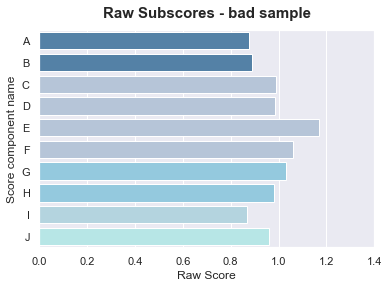

In [190]:
sns.barplot(x="Raw Score", y="Subscores", data=raw_scores_random_bad, palette=['steelblue', 'steelblue','lightsteelblue',
                                                'lightsteelblue', 'lightsteelblue','lightsteelblue','skyblue','skyblue',
                                                                          'lightblue','paleturquoise' ])
plt.yticks(fontsize = 11)
plt.xlabel("Raw Score")
plt.ylabel("Score component name")
plt.xlim(xmax = 1.4)
plt.title("Raw Subscores - bad sample", fontweight = "bold", pad=12, fontsize = 15)
plt.savefig("Raw_Subscores-Bad_sample")
plt.show()

### Good / Bad score - Merged

In [191]:
raw_scores_random_good = prepare_raw_scores_to_plot(scores_data_random_good)
raw_scores_random_good["sample"] = ["Sample 2"]*len(raw_scores_random_good["Subscores"])

raw_scores_random_bad = prepare_raw_scores_to_plot(scores_data_random_bad)
raw_scores_random_bad["sample"] = ["Sample 1"]*len(raw_scores_random_bad["Subscores"])

raw_scores_random = pd.concat([raw_scores_random_bad, raw_scores_random_good])

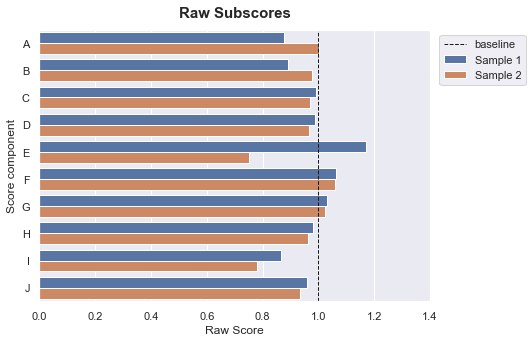

In [192]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.barplot(data = raw_scores_random, x= "Raw Score", y = "Subscores", hue = "sample")
plt.axvline(x=1.0,linewidth=1, color='k', ls='dashed', label = "baseline")
plt.legend(bbox_to_anchor=(1.01,1), loc = "upper left")
plt.yticks(fontsize = 11)
plt.xlabel("Raw Score")
plt.ylabel("Score component")
plt.xlim(xmax = 1.4)
plt.title("Raw Subscores", fontweight = "bold", pad=12, fontsize = 15)
plt.savefig("Raw_Subscores-Good_vs_Bad_sample", bbox_inches="tight")
plt.show()

### Weighted unstacked

In [44]:
scores = pd.read_csv(scores_data) 
scores = scores.loc[:,["Component Name","Weighted Score"]]
scores["Component Name"] = scores["Component Name"].astype('category').cat.reorder_categories([ 
       'Submission Score',
       'Accessibility: Number of work locations accessible within 15 minutes',
       'Accessibility: Number of secondary locations accessible within 15 minutes',
       'Level of service: average bus crowding experienced',
       'Level of service: average on-demand ride wait times',
       'Level of service: average trip expenditure - work',
       'Level of service: average trip expenditure - secondary',
       'Congestion: average vehicle delay per passenger trip',
       'Congestion: total vehicle miles traveled',
       'Mass transit level of service intervention: costs and benefits',
       'Sustainability: Total PM 2.5 Emissions'])

scores = scores.sort_values(by="Component Name")

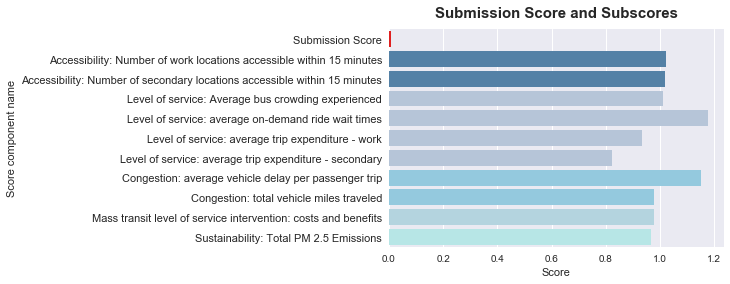

In [45]:
sns.barplot(x="Weighted Score", y="Component Name", data=scores, palette=['red','steelblue', 'steelblue','lightsteelblue',
                                                'lightsteelblue', 'lightsteelblue','lightsteelblue','skyblue','skyblue',
                                                                          'lightblue','paleturquoise' ])
plt.yticks(fontsize = 11)
plt.xlabel("Score")
plt.ylabel("Score component name")
plt.title("Submission Score and Subscores", fontweight = "bold", pad=12, fontsize = 15)
plt.show()

### Stacked

In [46]:
scores= pd.read_csv(scores_data) 
scores = scores.T
scores.columns=scores.iloc[0]
scores = scores.loc[["Weighted Score"],:]
scores = scores.drop(["Submission Score"], axis = 1)

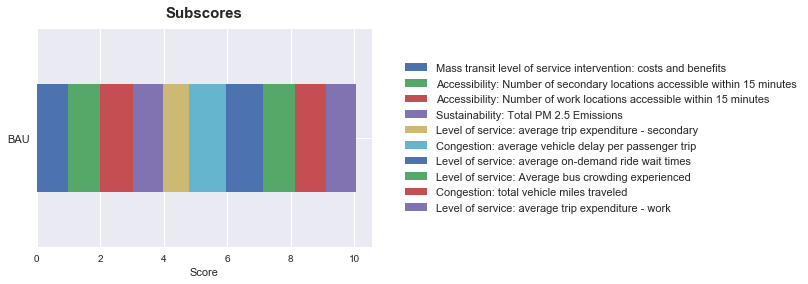

In [47]:
scores.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
plt.yticks([0],['BAU'],fontsize = 11 )
plt.xlabel("Score", fontsize = 11)
plt.legend(fontsize = 11, bbox_to_anchor=(2.3,0.5), loc="right")
plt.title("Subscores",fontweight = "bold", pad=12, fontsize = 15)
plt.show()

## Mode choice

In [268]:
# Get data
mode_choice_data_bau = path.join(warm_start_output_path, "modeChoice.csv")
mode_choice_per_hour_data = path.join(warm_start_output_path,"ITERS/it.100/100.realizedMode.csv")
mode_choice_random_bad_sample = path.join(results_random_sample1_output_path, "modeChoice.csv")
mode_choice_random_good_sample = path.join(results_random_sample2_output_path, "modeChoice.csv")

mode_choice_increased_bus_frequency = path.join(scenarios_input_increase_bus_frequency_path, "FrequencyAdjustment.csv")
mode_choice_luxembourg = path.join(scenarios_input_luxembourg_path, "FrequencyAdjustment.csv")
mode_choice_no_transit = r"/Users/vgolfi/Documents/Results_Exploration/output_no_transit/host9/sioux_faux/sioux_faux-15k__2019-02-06_20-00-57/modeChoice.csv"
mode_choice_Redistributive = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_23-49-25/modeChoice.csv"

mode_choice_data = mode_choice_Redistributive


### Overall mode choice

In [269]:
mode_choice = pd.read_csv(mode_choice_data)
# Select columns w/ modes
mode_choice = mode_choice.iloc[-1,:]
mode_choice = mode_choice.drop(["iterations"])
# Replace "ride_hail" by "on_demand ride"
mode_choice.rename({"ride_hail":"on-demand ride"}, inplace = True)
mode_choice

car               20670
drive_transit     490  
on-demand ride    2052 
walk              4496 
walk_transit      6787 
Name: 20, dtype: int64

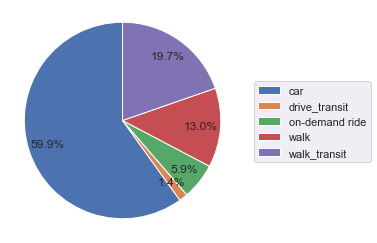

In [270]:
pie = mode_choice.plot(kind="pie", startangle=90, labels = None, autopct='%1.1f%%', pctdistance=0.8)
plt.axis("image")
labels = mode_choice.index.values
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=11, bbox_transform=plt.gcf().transFigure)
# plt.title("Overall mode choice - Sample 2", fontweight = "bold", fontsize=15, pad = 10)
plt.ylabel("")

# plt.savefig("Overall mode choice - BAU",bbox_inches="tight")
# plt.savefig("Overall mode choice - No_transit",bbox_inches="tight")
plt.savefig("Overall mode choice - Redistributive",bbox_inches="tight")
plt.show()

### Over the day

In [225]:
mode_choice_per_hour = pd.read_csv(mo)
mode_choice_per_hour = mode_choice_per_hour.set_index("hours")
mode_choice.rename({"ride_hail":"on-demand ride"}, inplace = True)

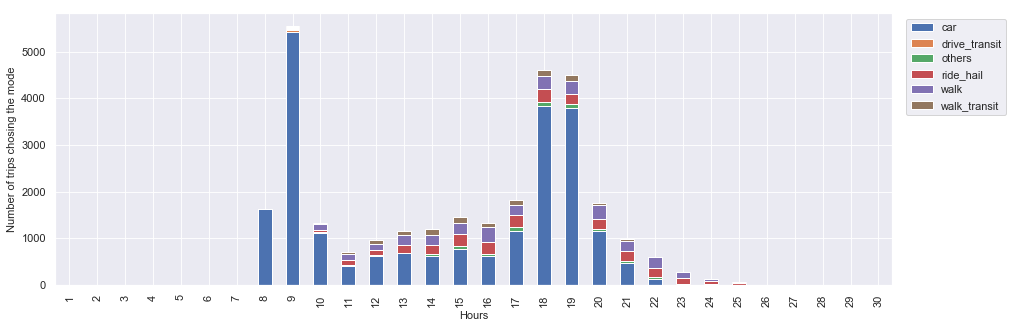

In [226]:
mode_choice_per_hour.plot.bar(stacked=True, figsize = (15,5))
plt.legend(bbox_to_anchor=(1.01,1), loc = "upper left")
plt.xlabel("Hours", fontsize=11)
plt.ylabel("Number of trips chosing the mode", fontsize=11)
# plt.title("Mode choice over the agent's day (goes over midnight)", fontweight = "bold", fontsize=15, pad =12)
plt.savefig("Mode Choice over the day - BAU",bbox_inches="tight")
plt.grid(alpha=0.9)
plt.show()

### By demographic group

In [56]:
event_data = extract_dataframe(str(event_data))
event_data

,time,type,person,vehicle,driver,vehicleType,length,numPassengers,departureTime,arrivalTime,...,score,parkingType,pricingModel,chargingType,parkingTaz,distance,cost,locationX,locationY,departTime
0,0.0,PersonEntersVehicle,rideHailAgent-600-2014000947834-080395,rideHailVehicle-600-2014000947834-080395,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,PersonEntersVehicle,rideHailAgent-1803-2016000394530-0133521,rideHailVehicle-1803-2016000394530-0133521,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,PersonEntersVehicle,rideHailAgent-700-2015001479356-0123424,rideHailVehicle-700-2015001479356-0123424,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,PersonEntersVehicle,rideHailAgent-1101-2016001223046-1152024,rideHailVehicle-1101-2016001223046-1152024,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,PersonEntersVehicle,rideHailAgent-1803-2014001480009-091497,rideHailVehicle-1803-2014001480009-091497,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000459447-19646,rideHailVehicle-10104-2012000459447-19646,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,PersonEntersVehicle,rideHailAgent-1105-2013000921416-150587,rideHailVehicle-1105-2013000921416-150587,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,PersonEntersVehicle,rideHailAgent-1200-2014000147028-064814,rideHailVehicle-1200-2014000147028-064814,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000719213-014044,rideHailVehicle-10104-2012000719213-014044,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,PersonEntersVehicle,rideHailAgent-1106-2012000198633-04004,rideHailVehicle-1106-2012000198633-04004,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
event_data.columns

Index(['time', 'type', 'person', 'vehicle', 'driver', 'vehicleType', 'length',
       'numPassengers', 'departureTime', 'arrivalTime', 'mode', 'links',
       'fuelType', 'fuel', 'capacity', 'startX', 'startY', 'endX', 'endY',
       'endLegFuelLevel', 'seatingCapacity', 'tollPaid', 'currentTourMode',
       'expectedMaximumUtility', 'location', 'availableAlternatives',
       'personalVehicleAvailable', 'tourIndex', 'link', 'actType', 'score',
       'parkingType', 'pricingModel', 'chargingType', 'parkingTaz', 'distance',
       'cost', 'locationX', 'locationY', 'departTime'],
      dtype='object')

In [61]:
event_data["type"].unique()

array(['PersonEntersVehicle', 'PathTraversal', 'ModeChoice', 'actend',
       'LeavingParkingEvent', 'ParkEvent', 'PersonLeavesVehicle',
       'actstart', 'ReserveRideHail', 'Replanning'], dtype=object)

In [62]:
event_data["numPassengers"].unique()

array([nan,  0.,  1.,  6.,  2.,  3.,  5.,  4.])

In [60]:
event_data["vehicleType"].unique()

array([None, 'BUS-DEFAULT', 'BODY-TYPE-DEFAULT', 'CAR-TYPE-DEFAULT'],
      dtype=object)

In [77]:
bus_events = event_data[event_data["vehicleType"]=="BUS-DEFAULT"]
bus_events.vehicle.unique()

array(['siouxareametro-sd-us:t_75366_b_219_tn_1',
       'siouxareametro-sd-us:t_60665_b_219_tn_0',
       'siouxareametro-sd-us:t_75348_b_219_tn_1',
       'siouxareametro-sd-us:t_75354_b_219_tn_1',
       'siouxareametro-sd-us:t_75372_b_219_tn_1',
       'siouxareametro-sd-us:t_75319_b_219_tn_1',
       'siouxareametro-sd-us:t_75380_b_219_tn_1',
       'siouxareametro-sd-us:t_75366_b_219_tn_2',
       'siouxareametro-sd-us:t_75329_b_219_tn_1',
       'siouxareametro-sd-us:t_501115_b_219_tn_0',
       'siouxareametro-sd-us:t_75335_b_219_tn_1',
       'siouxareametro-sd-us:t_501227_b_219_tn_0',
       'siouxareametro-sd-us:t_75324_b_219_tn_1',
       'siouxareametro-sd-us:t_75335_b_219_tn_2',
       'siouxareametro-sd-us:t_75380_b_219_tn_2',
       'siouxareametro-sd-us:t_501116_b_219_tn_0',
       'siouxareametro-sd-us:t_75348_b_219_tn_2',
       'siouxareametro-sd-us:t_75354_b_219_tn_2',
       'siouxareametro-sd-us:t_75329_b_219_tn_2',
       'siouxareametro-sd-us:t_501228_b_219_tn_

In [76]:
enters_veh_events = event_data[event_data["type"]=="PersonEntersVehicle"]
enters_veh_events

,time,type,person,vehicle,driver,vehicleType,length,numPassengers,departureTime,arrivalTime,...,score,parkingType,pricingModel,chargingType,parkingTaz,distance,cost,locationX,locationY,departTime
0,0.0,PersonEntersVehicle,rideHailAgent-600-2014000947834-080395,rideHailVehicle-600-2014000947834-080395,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,PersonEntersVehicle,rideHailAgent-1803-2016000394530-0133521,rideHailVehicle-1803-2016000394530-0133521,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,PersonEntersVehicle,rideHailAgent-700-2015001479356-0123424,rideHailVehicle-700-2015001479356-0123424,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,PersonEntersVehicle,rideHailAgent-1101-2016001223046-1152024,rideHailVehicle-1101-2016001223046-1152024,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,PersonEntersVehicle,rideHailAgent-1803-2014001480009-091497,rideHailVehicle-1803-2014001480009-091497,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000459447-19646,rideHailVehicle-10104-2012000459447-19646,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,PersonEntersVehicle,rideHailAgent-1105-2013000921416-150587,rideHailVehicle-1105-2013000921416-150587,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,PersonEntersVehicle,rideHailAgent-1200-2014000147028-064814,rideHailVehicle-1200-2014000147028-064814,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,PersonEntersVehicle,rideHailAgent-10104-2012000719213-014044,rideHailVehicle-10104-2012000719213-014044,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,PersonEntersVehicle,rideHailAgent-1106-2012000198633-04004,rideHailVehicle-1106-2012000198633-04004,None,None,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


## Accessibility

### Work-based trips

### Other trips

## Level of service

### Travel expenditure

In [10]:
# Level of service
travel_expenditure_data = path.join(stats_output_path, "summaryStats-15k.csv")

In [19]:
travel_expenditure= pd.read_csv(travel_expenditure_data)
travel_expenditure = travel_expenditure.iloc[-1,:]
travel_expenditure

Iteration                                          1.000000e+02
agencyRevenue_217                                  7.515000e+02
agentHoursOnCrowdedTransit                         1.080083e+01
averageMTWaitingTimeInSec                          3.258500e+02
averageOnDemandRideWaitTimeInSec                   2.214924e+00
averageTripExpenditure                             1.213987e+00
averageTripExpenditure_Home                        5.873696e-01
averageTripExpenditure_Secondary                   8.116502e-01
averageTripExpenditure_Work                        4.703238e-01
averageVehicleDelayPerMotorizedLeg_home            2.058922e+03
averageVehicleDelayPerMotorizedLeg_secondary       1.947948e+03
averageVehicleDelayPerMotorizedLeg_work            1.660066e+03
averageVehicleDelayPerPassengerTrip                1.996511e+03
busCrowding                                        3.877218e+01
fuelConsumedInMJ_Diesel                            1.782224e+05
fuelConsumedInMJ_Food                   

In [ ]:
summary_stats = pd.read_csv("")

### Bus crowding

## Congestion

### Average travel time

1.Import data

In [39]:
travel_time_data_sample2 = path.join(results_random_sample2_output_path, "20.averageTravelTimes.csv")
travel_time_data_sample1 = path.join(results_random_sample1_output_path, "20.averageTravelTimes.csv")
travel_time_data_bau = path.join(warm_start_output_path,"ITERS/it.100/100.averageTravelTimes.csv")
travel_time_data_bau = r"/Users/vgolfi/Documents/GitHub/BeamCompetitions/fixed-data/sioux_faux/bau/warm-start/sioux_faux-15k__warm-start/ITERS/it.100/100.averageTravelTimes.csv"
travel_time_Redistributive = r"/Users/vgolfi/Documents/Results_Exploration/output_redistributive_transit_on_demand/host9/sioux_faux/sioux_faux-15k__2019-02-06_23-49-25/ITERS/it.20/20.averageTravelTimes.csv"
travel_time_no_transit = r"/Users/vgolfi/Documents/Results_Exploration/output_no_transit/host9/sioux_faux/sioux_faux-15k__2019-02-06_20-00-57/ITERS/it.20/20.averageTravelTimes.csv"

travel_time_data = travel_time_no_transit


**BY MODE** 

In [272]:
travel_time = pd.read_csv(travel_time_data)
travel_time = travel_time.set_index("TravelTimeMode\Hour")
travel_time.rename({"ride_hail":"on_demand ride"}, inplace = True)
travel_time["mean"] = travel_time.mean(axis=1)
travel_time["mode"] = travel_time.index
travel_time = travel_time.drop(labels = "others", axis =0)
travel_time

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,mean,mode
TravelTimeMode\Hour,,,,,,,,,,,,,,,,,,,,,
car,0.0,0.0,0.0,0.0,0.0,0.0,16.433333,36.660615,57.104260,66.272700,...,47.250627,44.026493,40.643750,53.108333,53.426190,122.650000,NaN,NaN,40.252947,car
drive_transit,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,27.066667,31.300000,...,123.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.387434,drive_transit
on_demand ride,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.675000,16.804348,18.570513,...,25.543846,25.570312,26.324938,24.820370,24.065926,34.934615,17.916667,38.6,17.717657,on_demand ride
walk,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,44.250000,27.027193,30.227184,...,50.090284,53.563929,54.227882,53.866017,57.312698,78.700000,53.125000,NaN,35.177960,walk
walk_transit,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,47.016667,52.500000,40.946296,...,69.880303,64.595833,NaN,NaN,NaN,NaN,NaN,NaN,42.587767,walk_transit


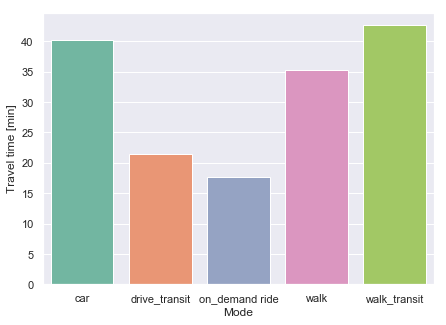

In [273]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(7,5)
sns.barplot(x = "mode", y = "mean", data=travel_time, palette = "Set2")
plt.yticks(fontsize = 11)
plt.xlabel("Mode")
plt.ylabel("Travel time [min]")
# plt.title("Average travel time per trip and by mode", fontweight = "bold", pad=12, fontsize = 15)

# plt.savefig("Average_travel_time_per_trip_by_mode_Sample1", bbox_inches="tight")
# plt.savefig("Average_travel_time_per_trip_by_mode_Sample2", bbox_inches="tight")
# plt.savefig("Average_travel_time_per_trip_by_mode_No_transit", bbox_inches="tight")
plt.savefig("Average_travel_time_per_trip_by_mode_Redistributive", bbox_inches="tight")

plt.show()

**OVER THE DAY** 

In [40]:
travel_time = pd.read_csv(travel_time_data)
travel_time = travel_time.set_index("TravelTimeMode\Hour")
travel_time.rename({"ride_hail":"on_demand ride"}, inplace = True)
# travel_time["mean"] = travel_time.mean(axis=1)
# travel_time["mode"] = travel_time.index
travel_time = travel_time.drop(labels = "others", axis =0)
travel_time.reset_index(inplace = True)


In [41]:
melted_travel_time = pd.melt(travel_time, id_vars="TravelTimeMode\Hour")
melted_travel_time.columns = ["mode", "hours", "travel time"]
melted_travel_time = melted_travel_time.sort_values(by = "hours")

In [42]:
melted_travel_time["hours"]= pd.to_numeric(melted_travel_time["hours"])
melted_travel_time.dtypes

mode           object 
hours          int64  
travel time    float64
dtype: object

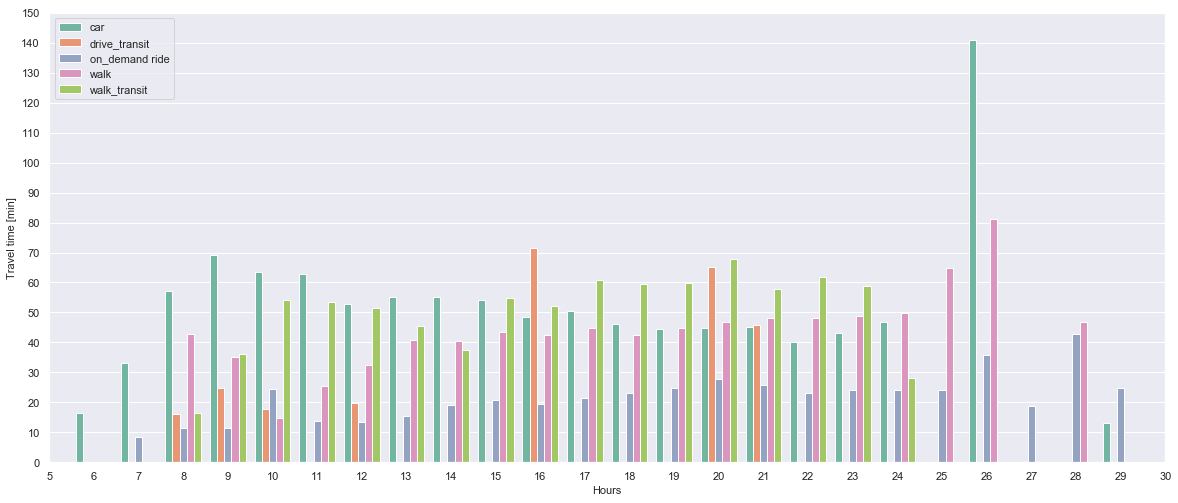

In [43]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8.27)
sns.barplot(ax = ax,x="hours", y="travel time", hue= "mode", data=melted_travel_time.sort_values(by = "hours"), palette = "Set2")
plt.legend(loc = "upper left")
plt.xlabel("Hours", fontsize = 11)
plt.ylabel("Travel time [min]", fontsize = 11)
plt.xlim((5,30))
plt.ylim((0,150))
plt.yticks(np.arange(0,151,10), np.arange(0,151,10),fontsize = 11)
plt.xticks(np.arange(5,31,1), np.arange(5,31,1),fontsize = 11)
# plt.title("Average travel time per passenger-trip over the day", fontweight = "bold", pad=12, fontsize = 15)

# plt.savefig("Average_travel_time_per_passenger_trip_over_the_day_bau", bbox_inches="tight")
plt.savefig("Average_travel_time_per_passenger_trip_over_the_day_No_transit", bbox_inches="tight")
# plt.savefig("Average_travel_time_per_passenger_trip_over_the_day_Redistributive", bbox_inches="tight")
# plt.savefig("Average_travel_time_per_passenger_trip_over_the_day_Sample_1", bbox_inches="tight")
# plt.savefig("Average_travel_time_per_passenger_trip_over_the_day_Sample_2", bbox_inches="tight")

plt.show()

### Delay

## Costs and Benefits of Mass Transit Level of Service Intervention

### Operational costs

### Incentives used

### Revenue 

## Sustainability

In [287]:
routes = pd.read_csv(r"/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/routes.txt")
routes = routes.iloc[:, :6]
routes.sort_values(by="route_id")


,agency_id,route_id,route_short_name,route_long_name,route_desc,route_type
0,217,1340,1,South Kiwanis Avenue/VA Medical Center,NaN,3
1,217,1341,2,S. Western/Sanford,NaN,3
4,217,1342,3,Downtown/Southwest Connector,NaN,3
5,217,1343,4,East 10th Street/East 12th Street,NaN,3
6,217,1344,5,South Phillips Avenue/Avera McKennan Hospital,NaN,3
7,217,1345,6,North Prairie Avenue,NaN,3
8,217,1346,7,North Cleveland/East 6th Street/Arrowhead Parkway,NaN,3
9,217,1347,8,North Industrial,NaN,3
10,217,1348,9,South Sycamore/East 26th Street,NaN,3
11,217,1349,10,Hayward/West Side,NaN,3
